# 1) XOR with Neural Network
**Problem:**
Build a small neural network to solve the XOR problem using:
- **Input:** [0,0], [0,1], [1,0], [1,1]
- **Output:** 0, 1, 1, 0
- **Use a 2-layer architecture.**

---

Final predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


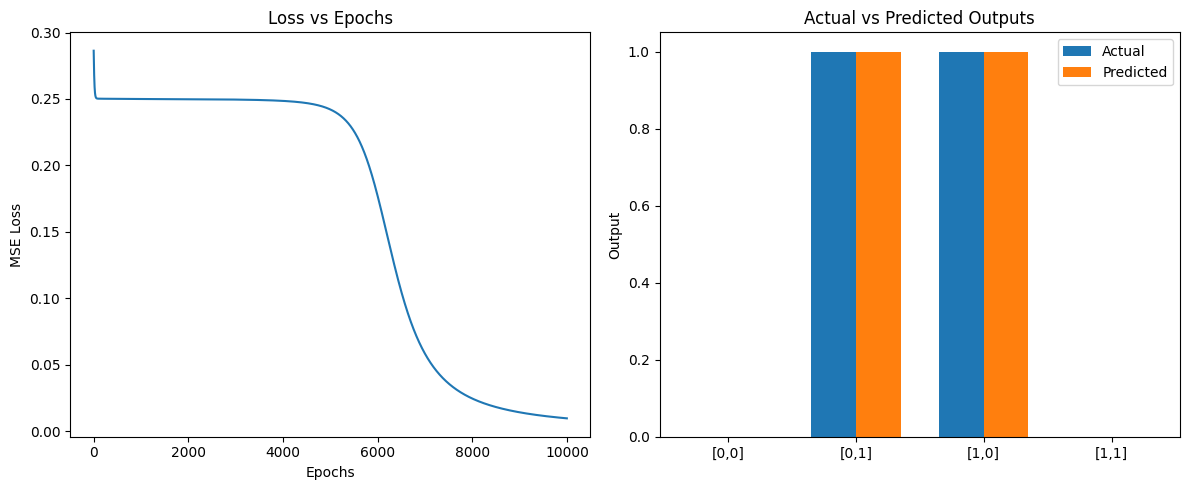

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# XOR data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights
np.random.seed(42)
W1 = np.random.uniform(-1, 1, (2, 2))
b1 = np.zeros((1, 2))
W2 = np.random.uniform(-1, 1, (2, 1))
b2 = np.zeros((1, 1))

# Training parameters
epochs = 10000
lr = 0.1
loss_history = []

# Training loop
for epoch in range(epochs):
    # Forward
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss
    loss = np.mean((y - a2) ** 2)
    loss_history.append(loss)

    # Backward
    d_output = (y - a2) * sigmoid_deriv(a2)
    d_hidden = d_output.dot(W2.T) * sigmoid_deriv(a1)

    # Update
    W2 += a1.T.dot(d_output) * lr
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr
    W1 += X.T.dot(d_hidden) * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

# Final predictions
predictions = np.round(a2)

print("Final predictions:")
print(predictions)

# Plot 1: Loss vs Epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")

# Plot 2: Output vs Actual
plt.subplot(1, 2, 2)
bar_width = 0.35
index = np.arange(4)
plt.bar(index, y.flatten(), bar_width, label='Actual')
plt.bar(index + bar_width, predictions.flatten(), bar_width, label='Predicted')
plt.xticks(index + bar_width / 2, ['[0,0]', '[0,1]', '[1,0]', '[1,1]'])
plt.ylabel("Output")
plt.title("Actual vs Predicted Outputs")
plt.legend()

plt.tight_layout()
plt.show()


# 2) Create a Tiny Neural Network from Scratch (No Libraries)
**Problem:**
Build a neural network with:
- One hidden layer (2 neurons)
- Input size = 2
- Output size = 1
- Activation = Sigmoid
- Loss = Mean Squared Error (MSE)

Train it for 10 iterations using dummy data, manually computing gradients (basic backprop).

---

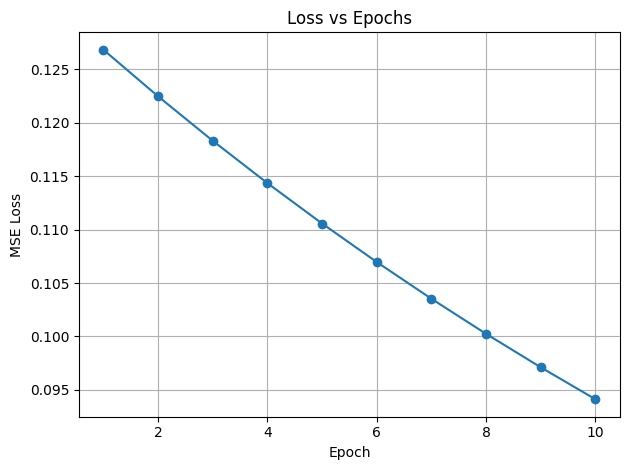

In [ ]:
import math
import matplotlib.pyplot as plt

# Sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# Dot product for two vectors
def dot(v1, v2):
    return sum(x*y for x, y in zip(v1, v2))

# Initialize weights and biases manually
W1 = [[0.1, 0.2], [0.3, 0.4]]  # 2x2 (input to hidden)
b1 = [0.0, 0.0]                # 2 biases for hidden
W2 = [0.5, 0.6]                # 2x1 (hidden to output)
b2 = 0.0

# Input and target
x = [1, 0]  # Input vector
y = 1       # Target output

# Learning rate
lr = 0.1

loss_history = []

# Training loop
for epoch in range(10):
    # Forward Pass
    z1 = [dot(x, [W1[0][i], W1[1][i]]) + b1[i] for i in range(2)]
    a1 = [sigmoid(z) for z in z1]
    z2 = dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss
    loss = (y - a2) ** 2
    loss_history.append(loss)

    # Backpropagation
    dL_da2 = -2 * (y - a2)
    dL_dz2 = dL_da2 * sigmoid_deriv(a2)
    dL_dW2 = [dL_dz2 * a for a in a1]
    dL_db2 = dL_dz2

    dL_da1 = [dL_dz2 * W2[i] for i in range(2)]
    dL_dz1 = [dL_da1[i] * sigmoid_deriv(a1[i]) for i in range(2)]
    dL_dW1 = [[dL_dz1[i] * x[j] for i in range(2)] for j in range(2)]
    dL_db1 = dL_dz1

    # Update weights and biases
    for i in range(2):
        W2[i] -= lr * dL_dW2[i]
        b1[i] -= lr * dL_db1[i]
        for j in range(2):
            W1[j][i] -= lr * dL_dW1[j][i]
    b2 -= lr * dL_db2

# Plotting the loss
plt.plot(range(1, 11), loss_history, marker='o')
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


# 3) Plot Activation Functions
**Problem:**
Write Python code to plot:
- Sigmoid
- Tanh
- ReLU
- Leaky ReLU

Over the range x = [-10, 10].
Note: Observe the saturation behavior and derivative issues.

---

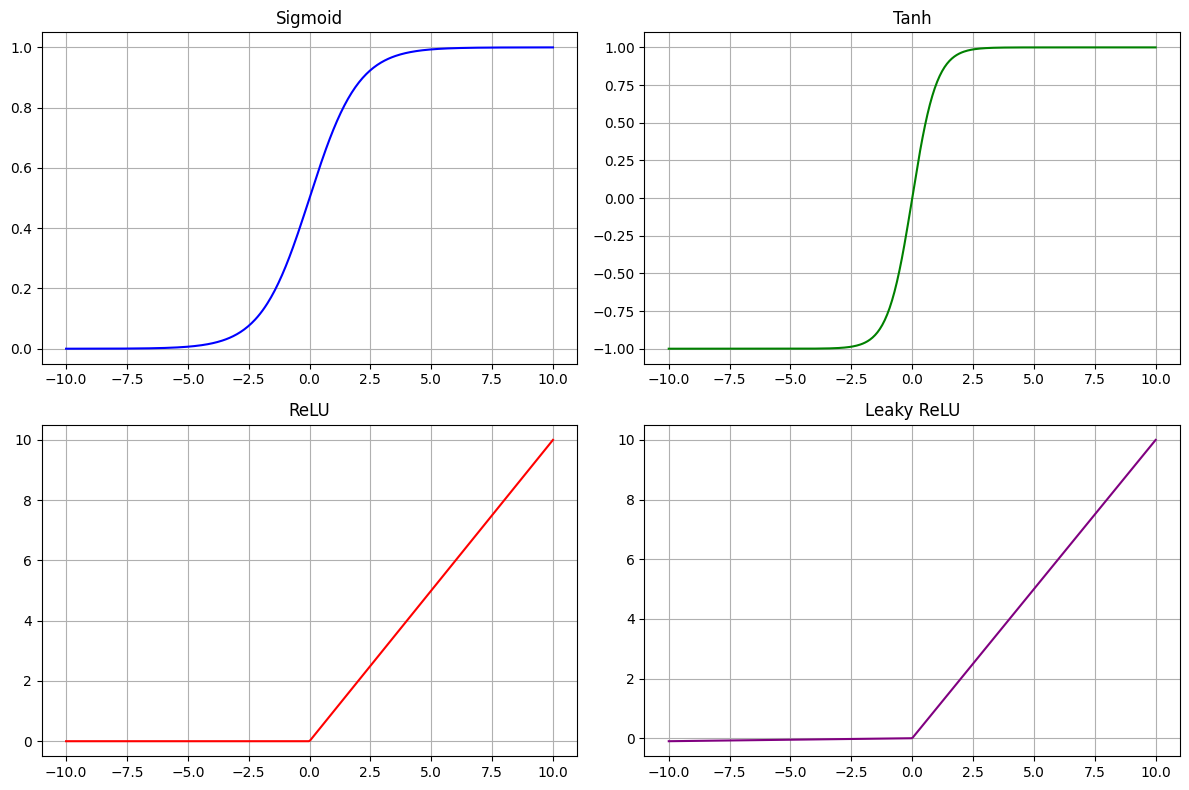

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Generate input range
x = np.linspace(-10, 10, 400)

# Compute activations
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky_relu = leaky_relu(x)

# Plotting all activation functions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, y_sigmoid, label='Sigmoid', color='blue')
plt.title("Sigmoid")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x, y_tanh, label='Tanh', color='green')
plt.title("Tanh")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(x, y_relu, label='ReLU', color='red')
plt.title("ReLU")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(x, y_leaky_relu, label='Leaky ReLU', color='purple')
plt.title("Leaky ReLU")
plt.grid(True)

plt.tight_layout()
plt.show()


# 4) Count the Parameters
**Problem:**
For a fully connected network with this structure:
- **Input:** 10 features
- **Hidden Layer 1:** 8 neurons
- **Hidden Layer 2:** 4 neurons
- **Output:** 1 neuron

How many trainable parameters does the network have?

---

###  Parameter Calculation for Fully Connected Network

**Architecture**:  
Input (10) → Hidden Layer 1 (8) → Hidden Layer 2 (4) → Output (1)



#### 1. Input → Hidden Layer 1
- Weights: `10 inputs × 8 neurons = 80`
- Biases: `8`
- **Total**: `80 + 8 = 88`



#### 2. Hidden Layer 1 → Hidden Layer 2
- Weights: `8 × 4 = 32`
- Biases: `4`
- **Total**: `32 + 4 = 36`



#### 3. Hidden Layer 2 → Output Layer
- Weights: `4 × 1 = 4`
- Biases: `1`
- **Total**: `4 + 1 = 5`



###  Total Trainable Parameters:
**Total = 88 + 36 + 5 = `129 trainable parameters`**


# 5) Understand Weight Initialization
**Problem:**
Try training the same network with:
- All weights = 0
- Weights = small random values
- Weights = large random values

Compare training performance.

---

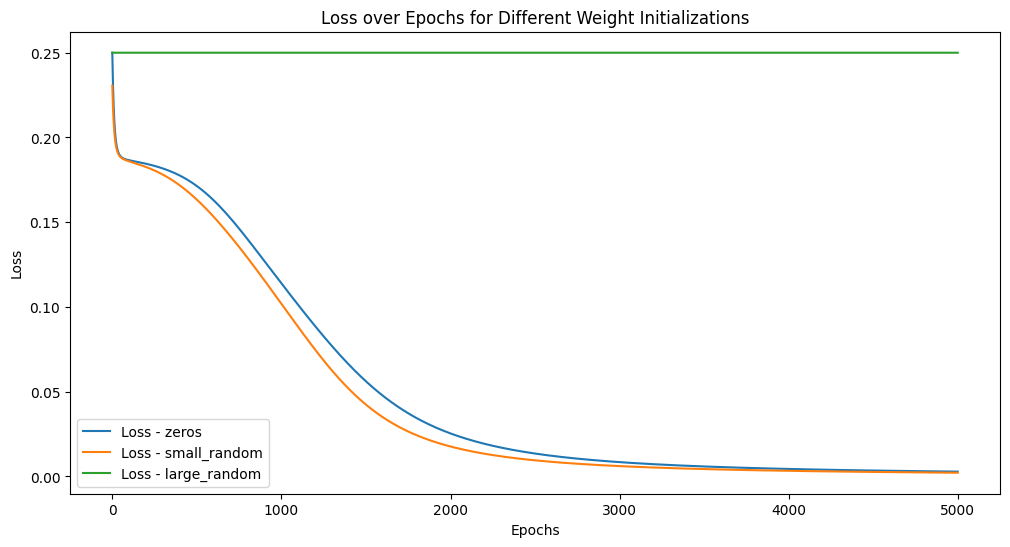

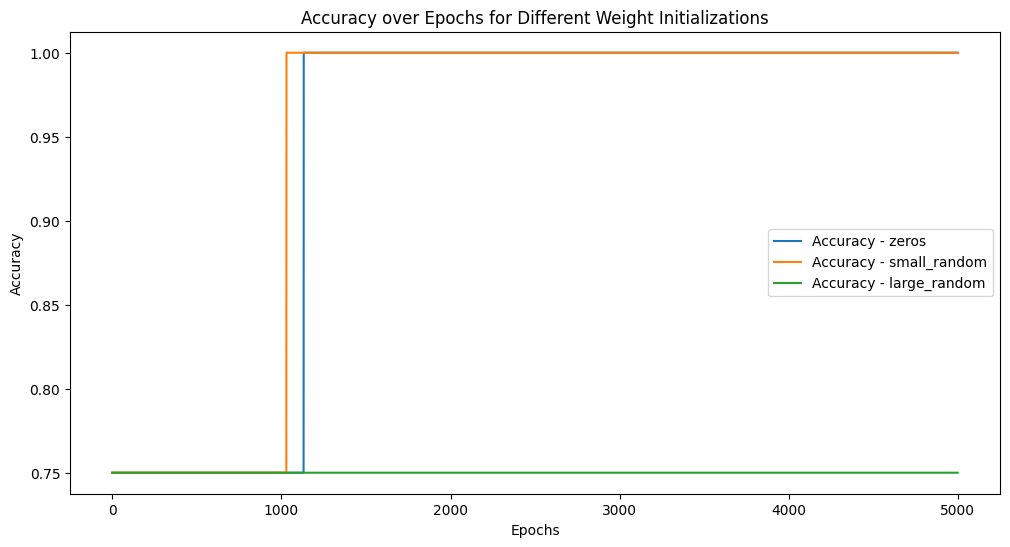

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the MSE loss function and its derivative
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, weight_init_type):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights based on the given type
        if weight_init_type == 'zeros':
            self.weights_input_hidden = np.zeros((self.input_size, self.hidden_size))
            self.weights_hidden_output = np.zeros((self.hidden_size, self.output_size))
        elif weight_init_type == 'small_random':
            self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * 0.1
            self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * 0.1
        elif weight_init_type == 'large_random':
            self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * 10
            self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * 10
        else:
            raise ValueError("Invalid weight initialization type")

        # Biases
        self.bias_hidden = np.zeros(self.hidden_size)
        self.bias_output = np.zeros(self.output_size)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y, learning_rate):
        # Compute the error
        output_error = self.final_output - y
        output_delta = output_error * sigmoid_derivative(self.final_output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output -= self.hidden_output.T.dot(output_delta) * learning_rate
        self.weights_input_hidden -= X.T.dot(hidden_delta) * learning_rate
        self.bias_output -= np.sum(output_delta, axis=0) * learning_rate
        self.bias_hidden -= np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        loss_history = []
        accuracy_history = []
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Compute loss and accuracy
            loss = mean_squared_error(y, y_pred)
            accuracy = np.mean(np.round(y_pred) == y)

            # Save loss and accuracy
            loss_history.append(loss)
            accuracy_history.append(accuracy)

            # Backward pass and update weights
            self.backward(X, y, learning_rate)

        return loss_history, accuracy_history

# Generate synthetic dataset (AND logic)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Hyperparameters
input_size = 2
hidden_size = 3
output_size = 1
epochs = 5000
learning_rate = 0.1

# Initialize and train the neural network with different weight initializations
initializations = ['zeros', 'small_random', 'large_random']
losses = {}
accuracies = {}

for init in initializations:
    nn = NeuralNetwork(input_size, hidden_size, output_size, init)
    loss, accuracy = nn.train(X, y, epochs, learning_rate)
    losses[init] = loss
    accuracies[init] = accuracy

# Plot the loss over epochs
plt.figure(figsize=(12, 6))
for init in initializations:
    plt.plot(losses[init], label=f'Loss - {init}')
plt.title('Loss over Epochs for Different Weight Initializations')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy over epochs
plt.figure(figsize=(12, 6))
for init in initializations:
    plt.plot(accuracies[init], label=f'Accuracy - {init}')
plt.title('Accuracy over Epochs for Different Weight Initializations')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 6) Train a Simple Neural Net on MNIST
**Problem:**
Use PyTorch or Keras to:
- Load MNIST
- Build a 2-layer neural network (no convolution)
- Train it for 5 epochs
- Plot training vs validation accuracy

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 476kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.43MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.41MB/s]


Epoch [1/5], Train Accuracy: 0.8901, Validation Accuracy: 0.9365
Epoch [2/5], Train Accuracy: 0.9420, Validation Accuracy: 0.9564
Epoch [3/5], Train Accuracy: 0.9574, Validation Accuracy: 0.9641
Epoch [4/5], Train Accuracy: 0.9661, Validation Accuracy: 0.9648
Epoch [5/5], Train Accuracy: 0.9704, Validation Accuracy: 0.9728


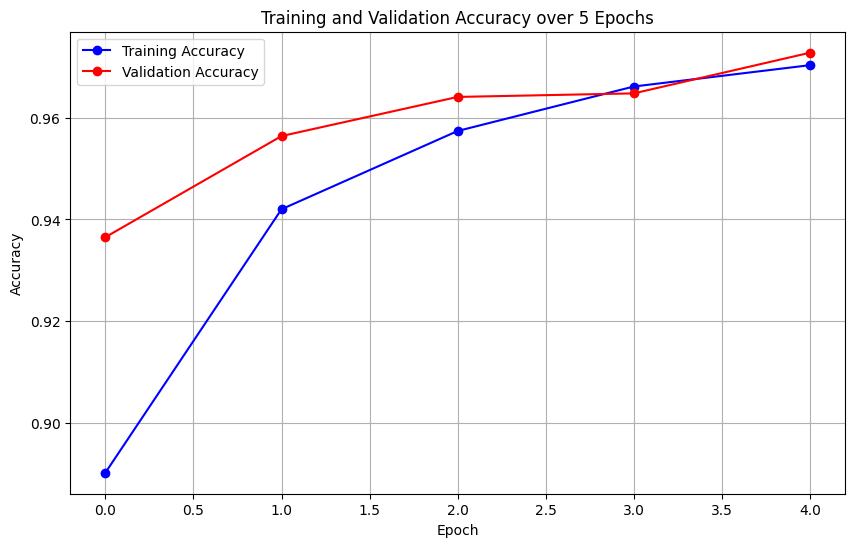

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the 2-layer Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (28x28 images flattened)
        self.fc2 = nn.Linear(128, 10)  # Output layer (10 classes for MNIST digits)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.relu(self.fc1(x))  # First hidden layer with ReLU activation
        x = self.fc2(x)  # Output layer (logits)
        return x

# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Initialize the neural network, loss function, and optimizer
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store accuracy values for plotting
train_accuracies = []
val_accuracies = []

# Training the network for 5 epochs
for epoch in range(5):
    model.train()
    correct_train = 0
    total_train = 0
    running_loss = 0

    # Training loop
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate training accuracy for this epoch
    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)

    # Validation loop
    model.eval()
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass (no backprop)
            outputs = model(inputs)

            # Calculate validation accuracy
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calculate validation accuracy for this epoch
    val_accuracy = correct_val / total_val
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/5], Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy', color='blue', marker='o')
plt.plot(val_accuracies, label='Validation Accuracy', color='red', marker='o')
plt.title('Training and Validation Accuracy over 5 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
